In [1]:
# 1. Import Libraries
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
# 🔥 Important: Now point to the 'train' folder specifically
data_path = "C:/Users/vanka/Downloads/src/Oily-Dry-Skin-Types/valid"

# Get categories (dry, normal, oily)
categories = [folder for folder in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder))]
print(f"Detected categories: {categories}")

X = []
y = []

# Loop over each category
for category in categories:
    folder = os.path.join(data_path, category)
    label = category
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        
        if os.path.isfile(img_path):
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (224, 224))
                img = img / 255.0  # Normalize
                
                X.append(img)
                y.append(label)
            except (UnidentifiedImageError, Exception) as e:
                print(f"Error loading image: {img_path} -> {e}")
                continue

X = np.array(X)
y = np.array(y)

print(f"✅ Loaded {len(X)} images successfully.")


Detected categories: ['dry', 'normal', 'oily']
✅ Loaded 4031 images successfully.


In [3]:
# 4. Encode Labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [4]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [5]:

# 6. Build the Model (Transfer Learning using VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False  # Freeze VGG16 layers

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
# 7. Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 411s 4s/step - accuracy: 0.4318 - loss: 1.7792 - val_accuracy: 0.6295 - val_loss: 0.8501
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 422s 4s/step - accuracy: 0.7278 - loss: 0.6841 - val_accuracy: 0.6568 - val_loss: 0.7974
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 431s 4s/step - accuracy: 0.8214 - loss: 0.4888 - val_accuracy: 0.7423 - val_loss: 0.6605
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 438s 4s/step - accuracy: 0.9188 - loss: 0.3153 - val_accuracy: 0.7621 - val_loss: 0.6272
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.9388 - loss: 0.2369 - val_accuracy: 0.7732 - val_loss: 0.6023
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 423s 4s/step - accuracy: 0.9625 - loss: 0.1615 - val_accuracy: 0.7608 - val_loss: 0.6232
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.9719 - loss: 0.1291 - val_accuracy: 0.7138 - val_loss: 0.7885
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 391s 4s/step - accuracy: 0.9738 - loss: 0.1053 - val_accu

In [7]:
# 8. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.8002 - loss: 0.5685
Test Accuracy: 78.69%


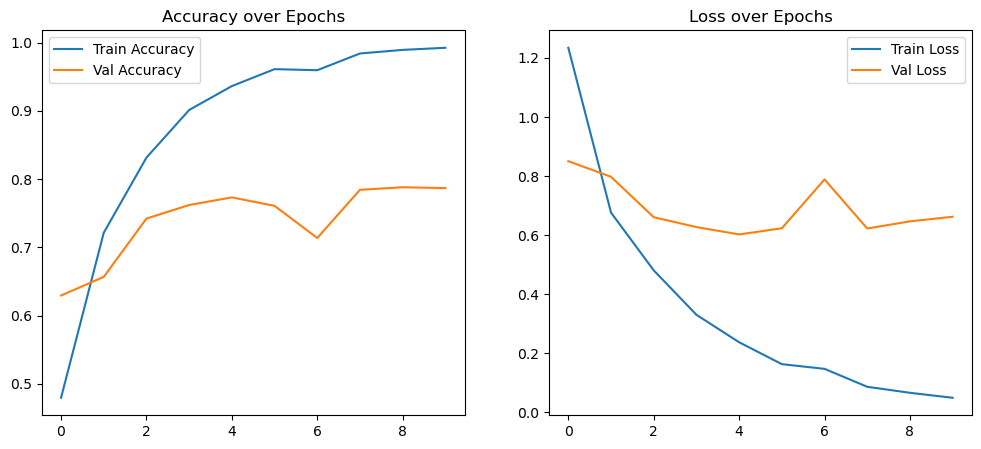

In [8]:
# 9. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


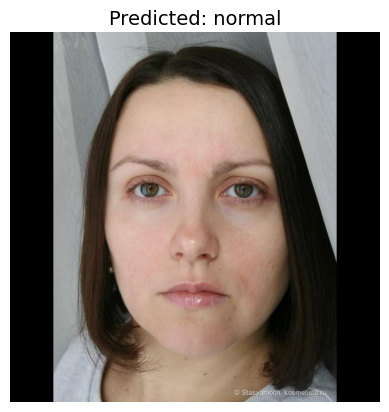

✅ Predicted Category: normal


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_image(img_path):
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        
        # Predict
        prediction = model.predict(img_array)
        pred_class = np.argmax(prediction)

        # Show the image
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"Predicted: {encoder.inverse_transform([pred_class])[0]}", fontsize=14)
        plt.show()

        # Print the prediction
        print(f"✅ Predicted Category: {encoder.inverse_transform([pred_class])[0]}")

    except Exception as e:
        print(f"❌ Error predicting image: {e}")

# Example usage
predict_image("4.jpg")


In [7]:
# Save the trained model to a file
model.fit save("skin_type_model.h5")
print("✅ Model saved successfully as skin_type_model.h5")


SyntaxError: invalid syntax (986173322.py, line 2)